<a href="https://colab.research.google.com/github/cjayjonathan/285-Machine-Learning-Projects-with-Python/blob/main/Practicalclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
print("Welcome to Practical sessions-classification and regression")

Welcome to Practical sessions-classification and regression


#Classification Example

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [17]:
Loan= pd.read_csv('/content/loan.csv')

In [18]:
Loan.head(5)

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college,loan_status
0,1000,30,45,0,0,0,1,0,PAIDOFF
1,1000,30,33,1,0,1,0,0,PAIDOFF
2,1000,15,27,0,0,0,0,1,PAIDOFF
3,1000,30,28,1,1,0,0,1,PAIDOFF
4,1000,30,29,0,1,0,0,1,PAIDOFF


In [19]:
Loan.dtypes

,0
Principal,int64
terms,int64
age,int64
Gender,int64
weekend,int64
Bachelor,int64
High School or Below,int64
college,int64
loan_status,object


In [20]:
Loan.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bachelor',
       'High School or Below', 'college', 'loan_status'],
      dtype='object')

In [21]:
Loan.isnull().sum()

,0
Principal,0
terms,0
age,0
Gender,0
weekend,0
Bachelor,0
High School or Below,0
college,0
loan_status,0


In [22]:
pearsoncorr=Loan.corr(method='pearson',numeric_only=True)

<Axes: >

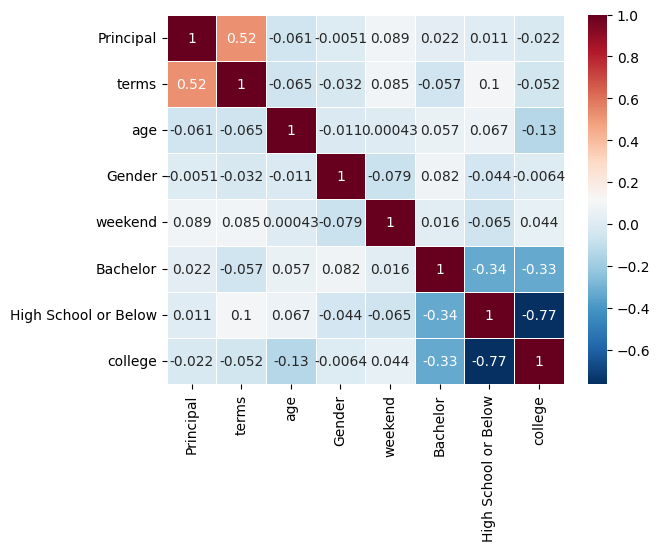

In [23]:
import seaborn as sb
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [24]:
X = Loan.drop('High School or Below', axis=1)

In [25]:
X = Loan.drop('loan_status', axis=1)
print('The values of the inputs are :',X)
y = Loan['loan_status']
print('The values of target are :',y)

The values of the inputs are :      Principal  terms  age  Gender  weekend  Bachelor  High School or Below  \
0         1000     30   45       0        0         0                     1   
1         1000     30   33       1        0         1                     0   
2         1000     15   27       0        0         0                     0   
3         1000     30   28       1        1         0                     0   
4         1000     30   29       0        1         0                     0   
..         ...    ...  ...     ...      ...       ...                   ...   
341        800     15   32       0        1         0                     1   
342       1000     30   25       0        1         0                     1   
343        800     15   39       0        0         0                     0   
344       1000     30   28       0        0         0                     0   
345       1000     30   26       0        0         0                     0   

     college  
0    

In [26]:
X_train, X_test, Y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", Y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (276, 8)
X_test Shape  :  (70, 8)
y_train Shape :  (276,)
y_test Shape  :  (70,)


In [27]:
#scaled = StandardScaler()
#X_train= scaled.fit_transform(X_train)
#X_test = scaled.transform(X_test)

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.transform(X_test)

In [29]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [30]:
ylrpredicted=lr.predict(X_test)
cm = confusion_matrix(y_test, ylrpredicted)
print(cm)

[[ 0 12]
 [ 0 58]]


<Axes: >

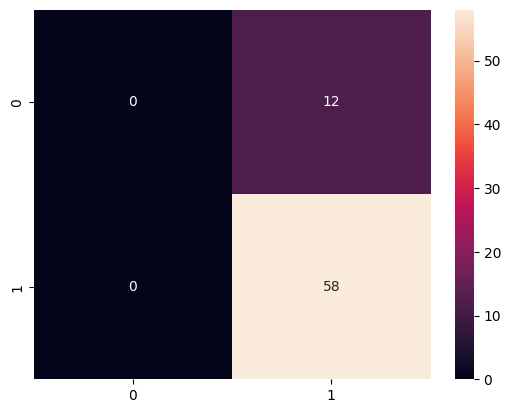

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [32]:
print(classification_report(y_test, ylrpredicted))
print("Accuracy:", accuracy_score(y_test, ylrpredicted))
print("F1_score:",f1_score(y_test, ylrpredicted, average='weighted'))
F1_LR=f1_score(y_test, ylrpredicted, average='weighted')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        12
     PAIDOFF       0.83      1.00      0.91        58

    accuracy                           0.83        70
   macro avg       0.41      0.50      0.45        70
weighted avg       0.69      0.83      0.75        70

Accuracy: 0.8285714285714286
F1_score: 0.7508928571428571


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
svm = SVC(kernel='poly')
# svm=SVC(kernel='rbf')#default
# svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='poly')

In [34]:
ysvmpredicted=svm.predict(X_test)
cm=confusion_matrix(y_test,ysvmpredicted)
print(cm)

[[ 2 10]
 [ 7 51]]


<Axes: >

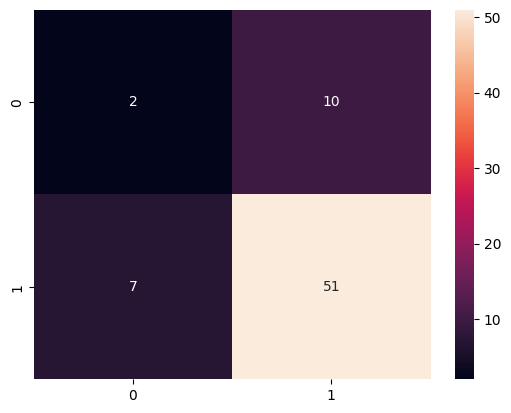

In [35]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test, ysvmpredicted))
print("Accuracy:", accuracy_score(y_test, ysvmpredicted))
print("F1_score:",f1_score(y_test, ysvmpredicted, average='weighted'))
F1_svm=f1_score(y_test, ysvmpredicted, average='weighted')

              precision    recall  f1-score   support

  COLLECTION       0.22      0.17      0.19        12
     PAIDOFF       0.84      0.88      0.86        58

    accuracy                           0.76        70
   macro avg       0.53      0.52      0.52        70
weighted avg       0.73      0.76      0.74        70

Accuracy: 0.7571428571428571
F1_score: 0.7428571428571428


In [37]:
tree = DecisionTreeClassifier()
#tree = DecisionTreeClassifier(max_depth=5,criterion="entropy")
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
ytreepredicted = tree.predict(X_test)
cm=confusion_matrix(y_test,ytreepredicted)
print(cm)

[[ 4  8]
 [15 43]]


<Axes: >

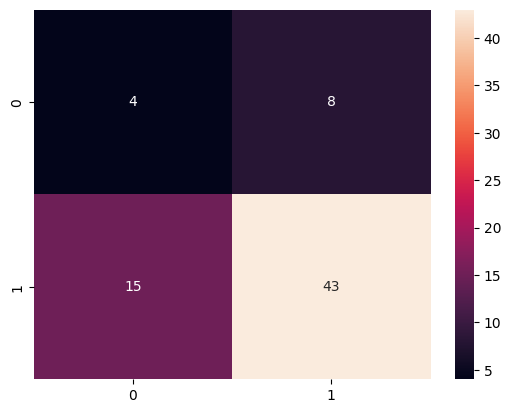

In [39]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(y_test, ytreepredicted))
print("Accuracy:", accuracy_score(y_test, ytreepredicted))
print("F1_score:",f1_score(y_test, ytreepredicted, average='weighted'))
F1_tree=f1_score(y_test, ytreepredicted, average='weighted')

              precision    recall  f1-score   support

  COLLECTION       0.21      0.33      0.26        12
     PAIDOFF       0.84      0.74      0.79        58

    accuracy                           0.67        70
   macro avg       0.53      0.54      0.52        70
weighted avg       0.73      0.67      0.70        70

Accuracy: 0.6714285714285714
F1_score: 0.6979748869065235


In [41]:
k=14
KNN = KNeighborsClassifier(n_neighbors =14)

In [42]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [43]:
yknnpredicted = KNN.predict(X_test)
cm=confusion_matrix(y_test,yknnpredicted)
print(cm)

[[ 8  4]
 [15 43]]


<Axes: >

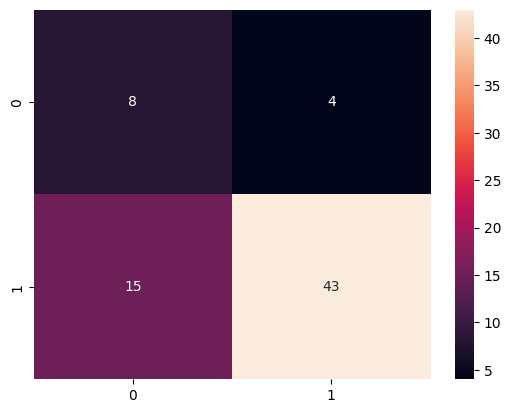

In [44]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(y_test, yknnpredicted))
print("Accuracy:", accuracy_score(y_test, yknnpredicted))
print("F1_score:",f1_score(y_test, yknnpredicted, average='weighted'))
F1_knn=f1_score(y_test, yknnpredicted, average='weighted')

              precision    recall  f1-score   support

  COLLECTION       0.35      0.67      0.46        12
     PAIDOFF       0.91      0.74      0.82        58

    accuracy                           0.73        70
   macro avg       0.63      0.70      0.64        70
weighted avg       0.82      0.73      0.76        70

Accuracy: 0.7285714285714285
F1_score: 0.7570068027210884


In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [47]:
yrfpredicted=rf.predict(X_test)
cm=confusion_matrix(y_test,yrfpredicted)
print(cm)


[[ 3  9]
 [13 45]]


<Axes: >

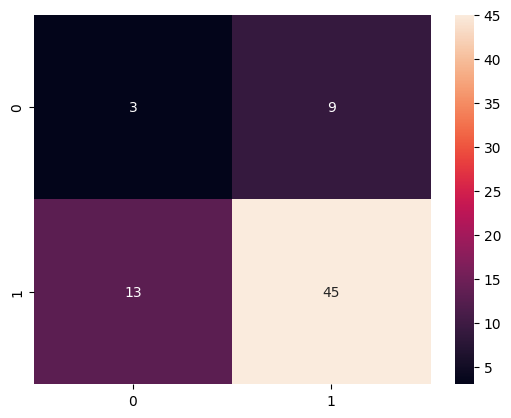

In [48]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [49]:
print(classification_report(y_test, yrfpredicted))
print("Accuracy:", accuracy_score(y_test, yrfpredicted))
print("F1_score:",f1_score(y_test, yrfpredicted, average='weighted'))
F1_rf=f1_score(y_test, yrfpredicted, average='weighted')

              precision    recall  f1-score   support

  COLLECTION       0.19      0.25      0.21        12
     PAIDOFF       0.83      0.78      0.80        58

    accuracy                           0.69        70
   macro avg       0.51      0.51      0.51        70
weighted avg       0.72      0.69      0.70        70

Accuracy: 0.6857142857142857
F1_score: 0.7025510204081633


In [50]:
GB= GradientBoostingClassifier()
GB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [51]:
yGBpredicted=GB.predict(X_test)
cm=confusion_matrix(y_test,yGBpredicted)
print(cm)

[[ 7  5]
 [12 46]]


<Axes: >

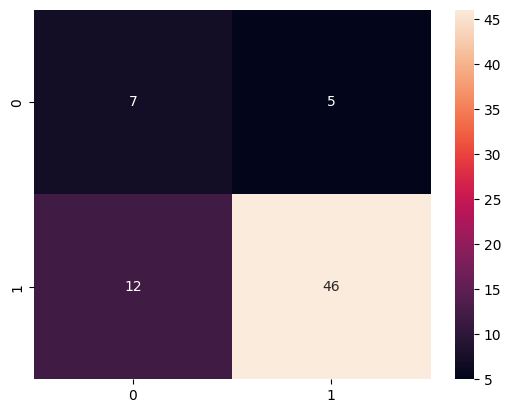

In [52]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_test, yGBpredicted))
print("Accuracy:", accuracy_score(y_test, yGBpredicted))
print("F1_score:",f1_score(y_test, yGBpredicted, average='weighted'))
F1_GB=f1_score(y_test, yGBpredicted, average='weighted')

              precision    recall  f1-score   support

  COLLECTION       0.37      0.58      0.45        12
     PAIDOFF       0.90      0.79      0.84        58

    accuracy                           0.76        70
   macro avg       0.64      0.69      0.65        70
weighted avg       0.81      0.76      0.78        70

Accuracy: 0.7571428571428571
F1_score: 0.7767640468439522


In [54]:
models = ['Logistic Regression', 'SVM','Decision Tree','KNN','Random Forest','Gradient boosted tree']
F1_score = [F1_LR, F1_svm, F1_tree, F1_knn,F1_rf,F1_GB]
compare_models = pd.DataFrame({ 'Algorithms': models, 'F1 Score': F1_score })
compare_models.sort_values(by = 'F1 Score', ascending = False)

,Algorithms,F1 Score
5,Gradient boosted tree,0.776764
3,KNN,0.757007
0,Logistic Regression,0.750893
1,SVM,0.742857
4,Random Forest,0.702551
2,Decision Tree,0.697975


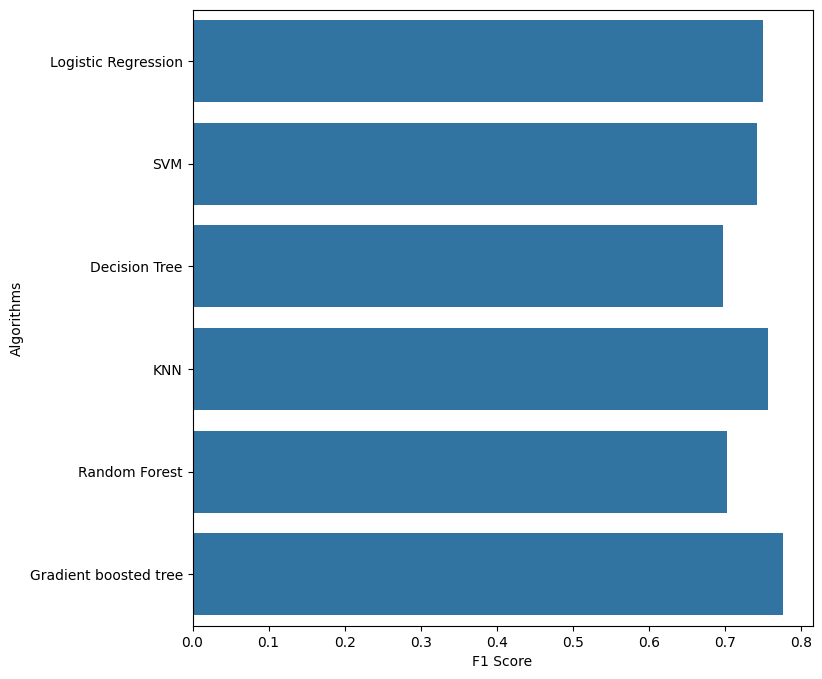

In [55]:
plt.figure(figsize=(8,8))
TestsScore=F1_score
sns.barplot(x = 'F1 Score', y = 'Algorithms', data = compare_models)
plt.show()